<a href="https://colab.research.google.com/github/asadstat/Data_analysis/blob/master/ML_with_FV_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics in R and Python


### Machine Learning Modeling using Python
#### Md. Mazharul Islam
#### Trainer, Data Analytics in R and Python

### Bangladesh Institute of Governance and Management (BIGM)

# 1. Read Data and Explore

In this approach, we will analyze datasets to summarize their main characteristics, with visual and quantitative methods.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import metrics, model_selection
#from sklearn.metrics import mean_squared_error
#from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
#from sklearn.ensemble import RandomForestClassifier 


def evalmodel(y_predicted, y_pred_prob, y_actual, modelname=None, dataset=None):
    cm = confusion_matrix(y_predicted, y_actual)
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[1,0]
    FN = cm[0,1]
    accuracy = (TP+TN)/(TP+FP+TN+FN)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    return(pd.DataFrame({'modelname':[modelname],'dataset':[dataset],'accuracy':[accuracy], 'sensitivity':[sensitivity], 'specificity':[specificity]}))

%matplotlib inline

### 1.1 Load Data
The "Social_Network_Ads.csv" datafile has information on purchasing particular product/service. The target variable is to predict whether a customer will purchase or not.  

In [38]:
# load csv2
customer = pd.read_csv('fd.csv')

# remove target and ID columns
feature = customer.drop(columns=['Family_Violence','FV'])

# target
targets = customers['FV']

In [40]:
feature.head()

,Unnamed: 0,Age,Gender,Marital_Status,Education,Occupation,Family_Type,Family_Member,Earning_Person,Head_of_Family,Religion,Residence_Location,Wealth.Index,Income_Before_Corona,Income_After_Corona,Lost_Job
0,1,23,1,0,1,1,1,5,1,1,1,1,1,6,2,1
1,2,23,1,0,3,1,2,3,1,1,1,1,1,3,1,2
2,3,23,1,0,2,1,1,4,4,1,1,2,1,3,3,2
3,4,23,1,0,1,1,1,3,1,1,1,1,1,3,2,1
4,5,23,1,0,2,1,2,4,2,1,1,1,1,3,2,1


In [41]:
targets.value_counts()

0    282
1    229
Name: FV, dtype: int64

In [ ]:
feature

### 1.2 Univariate Analysis

In [44]:
feature = feature.iloc[: , 1:]

In [45]:
# describe the characteristics of variables
feature.describe()

,Gender,Marital_Status,Education,Occupation,Family_Type,Family_Member,Earning_Person,Head_of_Family,Religion,Residence_Location,Wealth.Index,Income_Before_Corona,Income_After_Corona,Lost_Job
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,1.303327,0.195695,2.452055,1.279843,1.295499,5.127202,1.500978,1.387476,1.142857,1.407045,1.240705,3.530333,3.080235,1.203523
std,0.460146,0.397123,0.935755,0.618319,0.456714,2.207266,0.842207,0.843987,0.350270,0.491765,0.586437,1.598578,1.735280,0.403012
min,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000
50%,1.000000,0.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000
75%,2.000000,0.000000,3.000000,1.000000,2.000000,6.000000,2.000000,1.000000,1.000000,2.000000,1.000000,5.000000,5.000000,1.000000
max,2.000000,1.000000,5.000000,3.000000,2.000000,20.000000,6.000000,4.000000,2.000000,2.000000,4.000000,6.000000,6.000000,2.000000


In [81]:
from sklearn.preprocessing import Normalizer
normalize = Normalizer().fit_transform(feature)

In [82]:
import seaborn as sns
%matplotlib inline

In [83]:
corr = feature.corr()

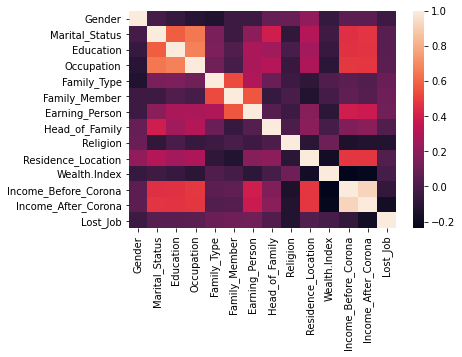

In [84]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
normalize

**Gender** is a categorical feature having male and female. The ML algorithm will only understand **Numbers**. We have to encode numeric to all categorical variables. Pandas have a good option to do this.  

In [103]:
X_train, X_test, y_train, y_test = train_test_split(normalize,targets, test_size=0.2, random_state=1234)

In [104]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

### 3.2 Divide into train and test

In [105]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 3.3 Train with train dataset

In [106]:
res = pd.DataFrame({'modelname':[None],'dataset':[None],'accuracy':[None], 'sensitivity':[None], 'specificity':[None]})
y_pred_prob_train = classifier.predict_proba(X_train)[:,1]
y_pred_train = classifier.predict(X_train)
res = res.append(evalmodel(y_predicted=y_pred_train, y_pred_prob=y_pred_prob_train, y_actual=y_train, modelname='Logistic', dataset='Train'))

In [107]:
res

,modelname,dataset,accuracy,sensitivity,specificity
0,None,None,NaN,NaN,NaN
0,Logistic,Train,0.634804,0.532967,0.716814


### 3.4 Check model performance

In [108]:
y_pred_prob_test = classifier.predict_proba(X_test)[:,1]
y_pred_test = classifier.predict(X_test)
res = res.append(evalmodel(y_predicted=y_pred_test, y_pred_prob=y_pred_prob_test, y_actual=y_test, modelname='Logistic', dataset='Test'))

In [109]:
res

,modelname,dataset,accuracy,sensitivity,specificity
0,None,None,NaN,NaN,NaN
0,Logistic,Train,0.634804,0.532967,0.716814
0,Logistic,Test,0.650485,0.510638,0.767857


In [110]:
res

,modelname,dataset,accuracy,sensitivity,specificity
0,None,None,NaN,NaN,NaN
0,Logistic,Train,0.634804,0.532967,0.716814
0,Logistic,Test,0.650485,0.510638,0.767857


## Decision tree

In [111]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [112]:
y_pred_prob_train = classifier.predict_proba(X_train)[:,1]
y_pred_train = classifier.predict(X_train)
res = res.append(evalmodel(y_predicted=y_pred_train, y_pred_prob=y_pred_prob_train, y_actual=y_train, modelname='Decision Tree', dataset='Train'))

In [113]:
res

,modelname,dataset,accuracy,sensitivity,specificity
0,None,None,NaN,NaN,NaN
0,Logistic,Train,0.634804,0.532967,0.716814
0,Logistic,Test,0.650485,0.510638,0.767857
0,Decision Tree,Train,0.975490,0.950549,0.995575


In [114]:
y_pred_prob_test = classifier.predict_proba(X_test)[:,1]
y_pred_test = classifier.predict(X_test)
res = res.append(evalmodel(y_predicted=y_pred_test, y_pred_prob=y_pred_prob_test, y_actual=y_test, modelname='Decision Tree', dataset='Test'))

In [115]:
res

,modelname,dataset,accuracy,sensitivity,specificity
0,None,None,NaN,NaN,NaN
0,Logistic,Train,0.634804,0.532967,0.716814
0,Logistic,Test,0.650485,0.510638,0.767857
0,Decision Tree,Train,0.975490,0.950549,0.995575
0,Decision Tree,Test,0.582524,0.510638,0.642857


## Random Forest

In [116]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
y_pred_prob_train = classifier.predict_proba(X_train)[:,1]
y_pred_train = classifier.predict(X_train)
res = res.append(evalmodel(y_predicted=y_pred_train, y_pred_prob=y_pred_prob_train, y_actual=y_train, modelname='Random Forest', dataset='Train'))

In [118]:
res

,modelname,dataset,accuracy,sensitivity,specificity
0,None,None,NaN,NaN,NaN
0,Logistic,Train,0.634804,0.532967,0.716814
0,Logistic,Test,0.650485,0.510638,0.767857
0,Decision Tree,Train,0.975490,0.950549,0.995575
0,Decision Tree,Test,0.582524,0.510638,0.642857
0,Random Forest,Train,0.975490,0.972527,0.977876


In [120]:
y_pred_prob_test = classifier.predict_proba(X_test)[:,1]
y_pred_test = classifier.predict(X_test)
res = res.append(evalmodel(y_predicted=y_pred_test, y_pred_prob=y_pred_prob_test, y_actual=y_test, modelname='Random Forest', dataset='Test'))

In [121]:
classifier.predict(X_test)

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [122]:
classifier.predict_proba(X_test)

array([[0.77492352, 0.22507648],
       [0.21833333, 0.78166667],
       [0.44      , 0.56      ],
       [0.79      , 0.21      ],
       [0.575     , 0.425     ],
       [0.19      , 0.81      ],
       [0.06      , 0.94      ],
       [0.56      , 0.44      ],
       [0.77      , 0.23      ],
       [0.83333333, 0.16666667],
       [0.79      , 0.21      ],
       [0.27      , 0.73      ],
       [0.27433333, 0.72566667],
       [0.635     , 0.365     ],
       [0.63521429, 0.36478571],
       [0.585     , 0.415     ],
       [0.57      , 0.43      ],
       [0.23      , 0.77      ],
       [0.575     , 0.425     ],
       [0.91      , 0.09      ],
       [0.78      , 0.22      ],
       [0.47816667, 0.52183333],
       [0.31      , 0.69      ],
       [0.50416667, 0.49583333],
       [0.94      , 0.06      ],
       [0.24738095, 0.75261905],
       [0.675     , 0.325     ],
       [0.65583333, 0.34416667],
       [0.84      , 0.16      ],
       [0.22      , 0.78      ],
       [0.

In [123]:
res

,modelname,dataset,accuracy,sensitivity,specificity
0,None,None,NaN,NaN,NaN
0,Logistic,Train,0.634804,0.532967,0.716814
0,Logistic,Test,0.650485,0.510638,0.767857
0,Decision Tree,Train,0.975490,0.950549,0.995575
0,Decision Tree,Test,0.582524,0.510638,0.642857
0,Random Forest,Train,0.975490,0.972527,0.977876
0,Random Forest,Test,0.592233,0.468085,0.696429
0,Random Forest,Test,0.592233,0.468085,0.696429


In [124]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(3,3))
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [125]:
y_pred_prob_train = classifier.predict_proba(X_train)[:,1]
y_pred_train = classifier.predict(X_train)
res = res.append(evalmodel(y_predicted=y_pred_train, y_pred_prob=y_pred_prob_train, y_actual=y_train, modelname='ANN', dataset='Train'))

In [126]:
res

,modelname,dataset,accuracy,sensitivity,specificity
0,None,None,NaN,NaN,NaN
0,Logistic,Train,0.634804,0.532967,0.716814
0,Logistic,Test,0.650485,0.510638,0.767857
0,Decision Tree,Train,0.975490,0.950549,0.995575
0,Decision Tree,Test,0.582524,0.510638,0.642857
0,Random Forest,Train,0.975490,0.972527,0.977876
0,Random Forest,Test,0.592233,0.468085,0.696429
0,Random Forest,Test,0.592233,0.468085,0.696429
0,ANN,Train,0.551471,0.027473,0.973451


In [127]:
y_pred_prob_test = classifier.predict_proba(X_test)[:,1]
y_pred_test = classifier.predict(X_test)
res = res.append(evalmodel(y_predicted=y_pred_test, y_pred_prob=y_pred_prob_test, y_actual=y_test, modelname='ANN', dataset='Test'))

In [128]:
res

,modelname,dataset,accuracy,sensitivity,specificity
0,None,None,NaN,NaN,NaN
0,Logistic,Train,0.634804,0.532967,0.716814
0,Logistic,Test,0.650485,0.510638,0.767857
0,Decision Tree,Train,0.975490,0.950549,0.995575
0,Decision Tree,Test,0.582524,0.510638,0.642857
0,Random Forest,Train,0.975490,0.972527,0.977876
0,Random Forest,Test,0.592233,0.468085,0.696429
0,Random Forest,Test,0.592233,0.468085,0.696429
0,ANN,Train,0.551471,0.027473,0.973451
0,ANN,Test,0.563107,0.042553,1.000000


## Deal with Imbalanced Data

In [129]:
targets.value_counts()

0    282
1    229
Name: FV, dtype: int64

In [130]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=6624)
x_ros, y_ros = ros.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [131]:
print("Actual counts: \n", y_train.value_counts(),"\n \n Balanced couts: \n",pd.Series(y_ros).value_counts())

Actual counts: 
 0    226
1    182
Name: FV, dtype: int64 
 
 Balanced couts: 
 1    226
0    226
dtype: int64


## Search for Appropriate Hyperparameters 

**Grid search** is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

##### Greed search for ANN

In [132]:
from sklearn.model_selection import GridSearchCV
parameters = {'hidden_layer_sizes':([2],[3],[4],[2,2],[3,3],[4,4],[2,2,2],[3,3,3],[4,4,4]), 'activation':('relu','tanh')}
classifier = MLPClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_gr

In [133]:
clf.best_params_

{'activation': 'tanh', 'hidden_layer_sizes': [4, 4]}